In [149]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Import datasets
# Read data into dataframes

feb22 = pd.read_csv("202202-divvy-tripdata.csv")
mar22 = pd.read_csv("202203-divvy-tripdata.csv")
apr22 = pd.read_csv("202204-divvy-tripdata.csv")
may22 = pd.read_csv("202205-divvy-tripdata.csv")
jun22 = pd.read_csv("202206-divvy-tripdata.csv")
jul22 = pd.read_csv("202207-divvy-tripdata.csv")
aug22 = pd.read_csv("202208-divvy-tripdata.csv")
sep22 = pd.read_csv("202209-divvy-tripdata.csv")
oct22 = pd.read_csv("202210-divvy-tripdata.csv")
nov22 = pd.read_csv("202211-divvy-tripdata.csv")
dec22 = pd.read_csv("202212-divvy-tripdata.csv")
jan23 = pd.read_csv("202301-divvy-tripdata.csv")


# Create a list of all dataframes

dflist = [
    feb22,
    mar22,
    apr22,
    may22,
    jun22,
    jul22,
    aug22,
    sep22,
    oct22,
    nov22,
    dec22,
    jan23
]




In [150]:
for df in dflist:
    print(df.shape[1])

13
13
13
13
13
13
13
13
13
13
13
13


In [151]:
# Each dataframe has 13 columns
# Inspect each df to see if columns are appropriately named
# After inspection, we discover that the columns are appropriately named which means they can be merged
# Create a single dataframe that combines the 12 dataframes
df = pd.concat(frames, axis=0, ignore_index=True)
print(df.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')


In [152]:
# Summary of the data
print(df.head(10))
print(df.info())

            ride_id  rideable_type           started_at             ended_at  \
0  E1E065E7ED285C02   classic_bike  2022-02-19 18:08:41  2022-02-19 18:23:56   
1  1602DCDC5B30FFE3   classic_bike  2022-02-20 17:41:30  2022-02-20 17:45:56   
2  BE7DD2AF4B55C4AF   classic_bike  2022-02-25 18:55:56  2022-02-25 19:09:34   
3  A1789BDF844412BE   classic_bike  2022-02-14 11:57:03  2022-02-14 12:04:00   
4  07DE78092C62F7B3   classic_bike  2022-02-16 05:36:06  2022-02-16 05:39:00   
5  9A2F204F04AB7E24   classic_bike  2022-02-07 09:51:57  2022-02-07 10:07:53   
6  D1E6BB679BDEDEE4   classic_bike  2022-02-14 10:38:54  2022-02-14 10:42:43   
7  DE23C1DC29B40237   classic_bike  2022-02-08 20:12:33  2022-02-08 20:21:16   
8  3E314B0F46667DE9  electric_bike  2022-02-25 13:49:05  2022-02-25 13:54:43   
9  04ED4D3E37D2351C   classic_bike  2022-02-06 07:36:15  2022-02-06 07:42:05   

             start_station_name start_station_id  \
0        State St & Randolph St     TA1305000029   
1   Halsted St 

In [153]:
# DATA CLEANING

# We need to check which columns and rows have missing data
# Columns with missing values
print(df.isnull().sum())

# Rows missing values
print(df[df.isnull().any(axis=1)])

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    843525
start_station_id      843525
end_station_name      902655
end_station_id        902655
start_lat                  0
start_lng                  0
end_lat                 5899
end_lng                 5899
member_casual              0
dtype: int64
                  ride_id  rideable_type           started_at  \
68       A1D55B29161CC038  electric_bike  2022-02-28 18:51:10   
167      0C22F4A23EE5EE8F  electric_bike  2022-02-01 08:54:13   
227      49629A775A71F7C9  electric_bike  2022-02-05 07:07:31   
228      A47A1C59A94837E4  electric_bike  2022-02-23 07:53:24   
261      C1BC5557E24B9EFF  electric_bike  2022-02-02 11:03:40   
...                   ...            ...                  ...   
5750748  9DB29F0B063AC45F  electric_bike  2023-01-19 23:46:47   
5750749  6B4E0FE9634C892D  electric_bike  2023-01-15 12:53:12   
5750750  A717081A5DF673DD

In [154]:
# The columns with missing values are start_station_name, start_station_id, end_station_name, end_station_id, end_lat and end_lng
# Find out the total number of rows that contain null values
sum_rows_null = df.isnull().any(axis=1).sum()
print(f"Total Null Rows: {sum_rows_null}")

# Percentage of rows with missing values in the dataset
pc_nullrows = sum_rows_null / df.shape[0] * 100
print(f" % of Null Rows: {pc_nullrows}")

Total Null Rows: 1316732
 % of Null Rows: 22.88278155546998


In [155]:
# Drop rows with missing data
df_clean = df.dropna(axis="index")
print(df_clean.isnull().sum())

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64


In [156]:
# Check for duplicates
total_duplicate = df_clean.duplicated().sum()
print(f"Duplicate rows: {total_duplicate}")

Duplicate rows: 0


In [157]:
# Cleaned data
print(df_clean)
print(df_clean.info())

                  ride_id  rideable_type           started_at  \
0        E1E065E7ED285C02   classic_bike  2022-02-19 18:08:41   
1        1602DCDC5B30FFE3   classic_bike  2022-02-20 17:41:30   
2        BE7DD2AF4B55C4AF   classic_bike  2022-02-25 18:55:56   
3        A1789BDF844412BE   classic_bike  2022-02-14 11:57:03   
4        07DE78092C62F7B3   classic_bike  2022-02-16 05:36:06   
...                   ...            ...                  ...   
5754243  A303816F2E8A35A8  electric_bike  2023-01-11 17:46:23   
5754244  BCDBB142CC610382   classic_bike  2023-01-30 15:08:10   
5754245  7D1C7CA80517183B   classic_bike  2023-01-06 19:34:50   
5754246  1A4EB636346DF527   classic_bike  2023-01-13 18:59:24   
5754247  069971675AC7DC62  electric_bike  2023-01-02 13:48:29   

                    ended_at            start_station_name start_station_id  \
0        2022-02-19 18:23:56        State St & Randolph St     TA1305000029   
1        2022-02-20 17:45:56   Halsted St & Wrightwood Ave   

In [158]:
# DATA PROCESSING

# Transform started_at and ended_at into datetime

df_clean["started_at"] = pd.to_datetime(df_clean["started_at"])
df_clean["ended_at"] = pd.to_datetime(df_clean["ended_at"])

# Sort dataframe in descending order based on ended_at colum
df_clean.sort_values(by=["ended_at"], inplace=True, ascending=False)
print(df_clean)

C:\Users\USER\AppData\Local\Temp\ipykernel_22644\3171076616.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["started_at"] = pd.to_datetime(df_clean["started_at"])
C:\Users\USER\AppData\Local\Temp\ipykernel_22644\3171076616.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["ended_at"] = pd.to_datetime(df_clean["ended_at"])


                  ride_id  rideable_type          started_at  \
5673127  AA98C5FAEC17832D   classic_bike 2023-01-31 23:19:11   
5608776  7BB4D2C730D8E4BE  electric_bike 2023-01-31 23:44:55   
5722878  56FF83E0D18B8AAB  electric_bike 2023-01-31 23:51:57   
5669344  D915F47D01416C18   classic_bike 2023-01-31 23:53:18   
5691656  03C7B7A14C694AEB   classic_bike 2023-01-31 23:51:19   
...                   ...            ...                 ...   
5027     CD92D9AF505AA077   classic_bike 2022-02-01 00:08:02   
78807    8EE14664AD0206CB   classic_bike 2022-02-01 00:35:38   
28238    AA521076CE8B981C   classic_bike 2022-02-01 00:28:11   
24395    E7F30D46ACF9071D  electric_bike 2022-02-01 00:04:30   
75131    6325229942E058A1   classic_bike 2022-02-01 00:03:18   

                   ended_at                     start_station_name  \
5673127 2023-02-01 00:28:12          Ravenswood Ave & Lawrence Ave   
5608776 2023-02-01 00:12:40                   Canal St & Monroe St   
5722878 2023-01-31 23

C:\Users\USER\AppData\Local\Temp\ipykernel_22644\3171076616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.sort_values(by=["ended_at"], inplace=True, ascending=False)


In [159]:
# Remove Feb 2023 data
feb23_filter = df["ended_at"] <= "2023-02-01 00:00:00"
df_clean = df_clean[feb23_filter]

C:\Users\USER\AppData\Local\Temp\ipykernel_22644\685201613.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[feb23_filter]


In [160]:
import numpy as np
# Create ride_length (in mins) column 
ride_length = df_clean["ended_at"] - df_clean["started_at"]
ride_length = np.round(ride_length.dt.total_seconds() / 60, 2)
df_clean["ride_length"] = ride_length

In [161]:
# Day_of_week
# This colum will contain the day of the week a ride started
df_clean["day_of_week"] = df_clean["started_at"].dt.day_name()

# Month columns
df_clean["month"] = pd.DatetimeIndex(df_clean["started_at"]).month
df_clean["month_name"] = df_clean["started_at"].dt.strftime("%b")
print(df_clean)

                  ride_id  rideable_type          started_at  \
5722878  56FF83E0D18B8AAB  electric_bike 2023-01-31 23:51:57   
5669344  D915F47D01416C18   classic_bike 2023-01-31 23:53:18   
5691656  03C7B7A14C694AEB   classic_bike 2023-01-31 23:51:19   
5600598  22E722436010598E  electric_bike 2023-01-31 23:48:16   
5668960  753C27BC337EBD39   classic_bike 2023-01-31 23:47:19   
...                   ...            ...                 ...   
5027     CD92D9AF505AA077   classic_bike 2022-02-01 00:08:02   
78807    8EE14664AD0206CB   classic_bike 2022-02-01 00:35:38   
28238    AA521076CE8B981C   classic_bike 2022-02-01 00:28:11   
24395    E7F30D46ACF9071D  electric_bike 2022-02-01 00:04:30   
75131    6325229942E058A1   classic_bike 2022-02-01 00:03:18   

                   ended_at                     start_station_name  \
5722878 2023-01-31 23:59:01                  Wells St & Hubbard St   
5669344 2023-01-31 23:57:38                   Paulina St & 18th St   
5691656 2023-01-31 23

In [162]:
# Data Summary
data_summary = df_clean.describe()
print(data_summary)

          start_lat     start_lng       end_lat       end_lng   ride_length  \
count  4.437514e+06  4.437514e+06  4.437514e+06  4.437514e+06  4.437514e+06   
mean   4.190188e+01 -8.764484e+01  4.190212e+01 -8.764494e+01  1.696546e+01   
std    4.264937e-02  2.495234e-02  7.070922e-02  1.203367e-01  4.259894e+01   
min    4.164850e+01 -8.783332e+01  0.000000e+00 -8.783000e+01 -1.687000e+02   
25%    4.188103e+01 -8.765814e+01  4.188103e+01 -8.765842e+01  6.000000e+00   
50%    4.189689e+01 -8.764182e+01  4.189766e+01 -8.764275e+01  1.052000e+01   
75%    4.192877e+01 -8.762858e+01  4.192883e+01 -8.762858e+01  1.888000e+01   
max    4.206487e+01 -8.752531e+01  4.206485e+01  0.000000e+00  3.435407e+04   

              month  
count  4.437514e+06  
mean   6.994587e+00  
std    2.602655e+00  
min    1.000000e+00  
25%    5.000000e+00  
50%    7.000000e+00  
75%    9.000000e+00  
max    1.200000e+01  


In [163]:
# We notice that ride_length has a negative value 
neg_ride_length = df_clean[df_clean["ride_length"] < 0]
print(f"Rows with negative ride length value {neg_ride_length}")

Rows with negative ride length value                   ride_id  rideable_type          started_at  \
5263805  9709ACD5F0E8222D   classic_bike 2022-11-14 00:21:59   
5217426  8BC7D5602F31D869  electric_bike 2022-11-06 01:52:40   
5217408  C7141D479EB80507  electric_bike 2022-11-06 01:56:47   
5215667  8E63B36510B38694  electric_bike 2022-11-06 01:54:30   
5217406  72C7B4E6882492B1  electric_bike 2022-11-06 01:37:55   
...                   ...            ...                 ...   
2617739  461CC55C9B00468B  electric_bike 2022-07-09 20:31:40   
1532290  072E947E156D142D  electric_bike 2022-06-07 19:14:46   
1707035  BF114472ABA0289C  electric_bike 2022-06-07 19:14:47   
302998   7407049C5D89A13D  electric_bike 2022-03-05 11:38:04   
299821   2D97E3C98E165D80   classic_bike 2022-03-05 11:00:57   

                   ended_at                      start_station_name  \
5263805 2022-11-14 00:17:36              Fort Dearborn Dr & 31st St   
5217426 2022-11-06 01:37:18                    McClu

In [164]:
# 69 rows have negative ride_length values which we will filter out before our analysis
df_clean = df_clean[df_clean["ride_length"] > 0]
df_clean

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,month,month_name
5722878,56FF83E0D18B8AAB,electric_bike,2023-01-31 23:51:57,2023-01-31 23:59:01,Wells St & Hubbard St,TA1307000151,Federal St & Polk St,SL-008,41.889923,-87.634291,41.872078,-87.629544,member,7.07,Tuesday,1,Jan
5669344,D915F47D01416C18,classic_bike,2023-01-31 23:53:18,2023-01-31 23:57:38,Paulina St & 18th St,TA1307000159,Racine Ave & 18th St,13164,41.857901,-87.668745,41.858166,-87.656495,member,4.33,Tuesday,1,Jan
5691656,03C7B7A14C694AEB,classic_bike,2023-01-31 23:51:19,2023-01-31 23:55:33,University Ave & 57th St,KA1503000071,Ellis Ave & 60th St,KA1503000014,41.791478,-87.599861,41.785097,-87.601073,casual,4.23,Tuesday,1,Jan
5600598,22E722436010598E,electric_bike,2023-01-31 23:48:16,2023-01-31 23:55:17,Halsted St & Wrightwood Ave,TA1309000061,Damen Ave & Wellington Ave,13268,41.929150,-87.649079,41.935880,-87.678420,member,7.02,Tuesday,1,Jan
5668960,753C27BC337EBD39,classic_bike,2023-01-31 23:47:19,2023-01-31 23:52:42,Ellis Ave & 60th St,KA1503000014,Harper Ave & 59th St,KA1503000070,41.785097,-87.601073,41.787943,-87.588315,member,5.38,Tuesday,1,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5027,CD92D9AF505AA077,classic_bike,2022-02-01 00:08:02,2022-02-01 00:47:53,Millennium Park,13008,Michigan Ave & 8th St,623,41.881032,-87.624084,41.872773,-87.623981,casual,39.85,Tuesday,2,Feb
78807,8EE14664AD0206CB,classic_bike,2022-02-01 00:35:38,2022-02-01 00:39:07,Clinton St & Lake St,13021,Kingsbury St & Kinzie St,KA1503000043,41.885637,-87.641823,41.889177,-87.638506,member,3.48,Tuesday,2,Feb
28238,AA521076CE8B981C,classic_bike,2022-02-01 00:28:11,2022-02-01 00:30:10,Broadway & Cornelia Ave,13278,Broadway & Waveland Ave,13325,41.945529,-87.646439,41.949074,-87.648636,member,1.98,Tuesday,2,Feb
24395,E7F30D46ACF9071D,electric_bike,2022-02-01 00:04:30,2022-02-01 00:17:12,Broadway & Berwyn Ave,13109,Western Ave & Leland Ave,TA1307000140,41.978369,-87.659778,41.966400,-87.688704,casual,12.70,Tuesday,2,Feb


In [165]:
# DATA ANALYSIS

# SUMMARY
data_descrption = df_clean.describe()
print(data_descrption)

          start_lat     start_lng       end_lat       end_lng   ride_length  \
count  4.437202e+06  4.437202e+06  4.437202e+06  4.437202e+06  4.437202e+06   
mean   4.190188e+01 -8.764484e+01  4.190212e+01 -8.764494e+01  1.696705e+01   
std    4.264919e-02  2.495224e-02  7.071065e-02  1.203407e-01  4.259974e+01   
min    4.164850e+01 -8.783332e+01  0.000000e+00 -8.783000e+01  2.000000e-02   
25%    4.188103e+01 -8.765814e+01  4.188103e+01 -8.765842e+01  6.000000e+00   
50%    4.189689e+01 -8.764182e+01  4.189766e+01 -8.764275e+01  1.052000e+01   
75%    4.192877e+01 -8.762858e+01  4.192883e+01 -8.762858e+01  1.888000e+01   
max    4.206487e+01 -8.752531e+01  4.206485e+01  0.000000e+00  3.435407e+04   

              month  
count  4.437202e+06  
mean   6.994545e+00  
std    2.602656e+00  
min    1.000000e+00  
25%    5.000000e+00  
50%    7.000000e+00  
75%    9.000000e+00  
max    1.200000e+01  


In [166]:
# From the summary:
# The average ride_length is 17 minutes.
# The minimum value of ride_length in the data is 0.02, indicating that the shortest ride in the dataset was approximately 1.2 seconds long. 
# The maximum value of ride_length is 34,354.07, indicating that the longest ride in the dataset was over 23 days long. 
# Since ride_length is measured in minutes, the maximum value of 34,354.07 minutes corresponds to approximately 24 days and 1 hour.

In [167]:
# Total number of riders per category
total_riders = df_clean["member_casual"].value_counts()
print("Number of riders per category \n",total_riders)

Number of riders per category 
 member    2662142
casual    1775060
Name: member_casual, dtype: int64


In [168]:
# Confirm the total number of bike-share riders
total_riders_id = df_clean.groupby(["member_casual"])["ride_id"].count()
print(f"Total riders using ride_id \n {total_riders_id}")

Total riders using ride_id 
 member_casual
casual    1775060
member    2662142
Name: ride_id, dtype: int64


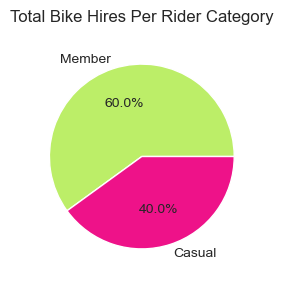

In [169]:
# Pie chart to show riders per category
fig, ax = plt.subplots(figsize=(7, 3), dpi=100)
labels = ["Member", "Casual"]
colors = ['#BCEE68','#EE1289']
plt.pie(x=total_riders, autopct="%.1f%%",colors=colors,labels=labels) 
ax.set_title("Total Bike Hires Per Rider Category", pad=14, fontsize=12, loc="center")
plt.savefig("pie_total_category.png", dpi=300)
plt.show()

In [170]:
# Find out how bike hires were distibuted throughout the year

ride_hires_per_month = (
    df_clean["month"]
    .value_counts(sort=False)
    .rename_axis("Month")
    .reset_index(name="Total Hires")
)

months = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]
print(ride_hires_per_month)

    Month  Total Hires
0       1       148278
1      12       135393
2      11       255752
3      10       414238
4       9       535119
5       8       605275
6       7       642629
7       6       620311
8       5       502516
9       4       272546
10      3       215971
11      2        89174


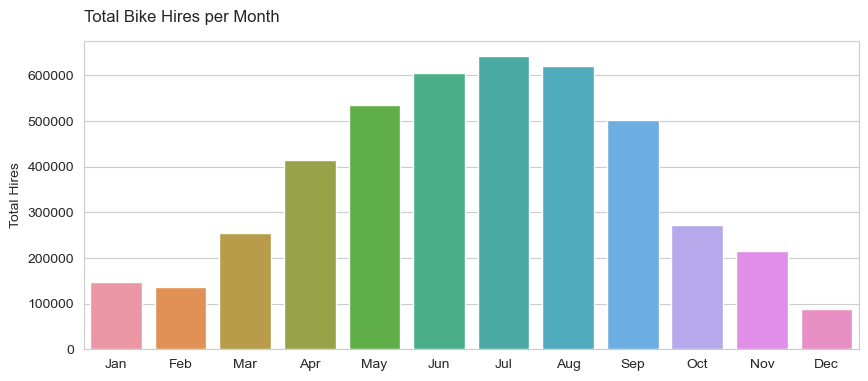

In [171]:
plt.figure(figsize=(10, 4), dpi=100)
plt.title("Total Bike Hires per Month", loc="left", pad=14)
sns.barplot(data=ride_hires_per_month, x=months, y="Total Hires")
plt.savefig("total_hires_per_month.png", dpi=300)
plt.show()

In [172]:
# Find out what days of the week have the most bike hires

hires_per_day = (
    df_clean["day_of_week"]
    .value_counts()
    .rename_axis("Day")
    .reset_index(name="Total Hires")
)
hires_per_day.sort_values(by=["Total Hires"], inplace=True, ascending=False)
print(hires_per_day)

         Day  Total Hires
0   Saturday       709560
1   Thursday       654343
2  Wednesday       628631
3    Tuesday       623929
4     Friday       617397
5     Sunday       607386
6     Monday       595956


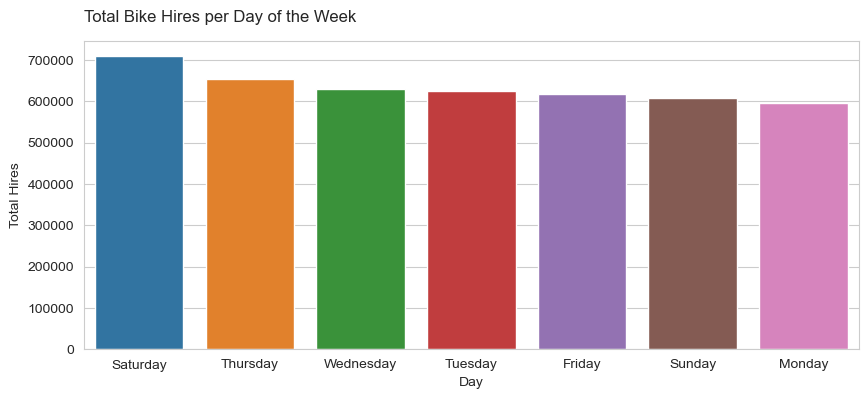

In [173]:
plt.figure(figsize=(10, 4), dpi=100)
plt.title("Total Bike Hires per Day of the Week", loc="left", pad=14)
sns.barplot(data=hires_per_day, x="Day", y="Total Hires")
plt.savefig("totalhire_per_day.png", dpi=300)
plt.show()

In [174]:
# Bike hires per category per month
# Find out how ridership compares each month for the two rider categories

monthly_bike_hires_per_customer_category = df_clean.groupby(["member_casual"])[
    "month_name"
].value_counts(sort=True)

cm_month = pd.DataFrame()
cm_month["casual"] = monthly_bike_hires_per_customer_category["casual"]
cm_month["member"] = monthly_bike_hires_per_customer_category["member"]
cm_month["Month"] = monthly_casual_member_df.index


print(cm_month)

            casual  member Month
month_name                      
Jul         311649  330980   Jul
Jun         292053  328258   Jun
Aug         270074  335201   Aug
Sep         220905  314214   Sep
May         220232  282284   May
Oct         151312  262926   Oct
Apr          91889  180657   Apr
Nov          73533  182219   Nov
Mar          67150  148821   Mar
Dec          31502  103891   Dec
Jan          29618  118660   Jan
Feb          15143   74031   Feb


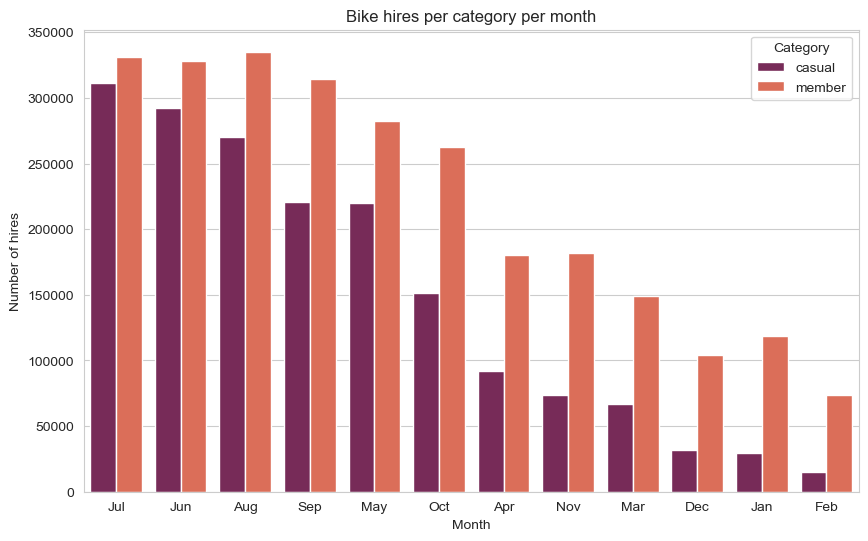

In [175]:
# Reshape the data to a long format
monthly_casual_member_melted = cm_month.melt(id_vars=["Month"], 
                                                             var_name="Category",
                                                             value_name="Number of Hires")

# Plot the data using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Month", y="Number of Hires", hue="Category", data=monthly_casual_member_melted, palette="rocket")
plt.title("Bike hires per category per month")
plt.xlabel("Month")
plt.ylabel("Number of hires")
plt.savefig("bikehires_per_month.png", dpi=300)
plt.show()

In [176]:
# Bike hires per category per day
# Find out how ridership compares every day for the two rider categories

bike_hires_per_customer_category = df_clean.groupby(["member_casual"])[
    "day_of_week"].value_counts(sort=True)
print(bike_hires_per_customer_category)

cm_day = pd.DataFrame()
cm_day["casual"] = bike_hires_per_customer_category["casual"]
cm_day["member"] = bike_hires_per_customer_category["member"]
cm_day["Day"] = casual_member_df.index

print(cm_day)

member_casual  day_of_week
casual         Saturday       368373
               Sunday         304411
               Friday         250690
               Thursday       231902
               Monday         213346
               Wednesday      206439
               Tuesday        199899
member         Tuesday        424030
               Thursday       422441
               Wednesday      422192
               Monday         382610
               Friday         366707
               Saturday       341187
               Sunday         302975
Name: day_of_week, dtype: int64
             casual  member        Day
day_of_week                           
Saturday     368373  341187   Saturday
Sunday       304411  302975     Sunday
Friday       250690  366707     Friday
Thursday     231902  422441   Thursday
Monday       213346  382610     Monday
Wednesday    206439  422192  Wednesday
Tuesday      199899  424030    Tuesday


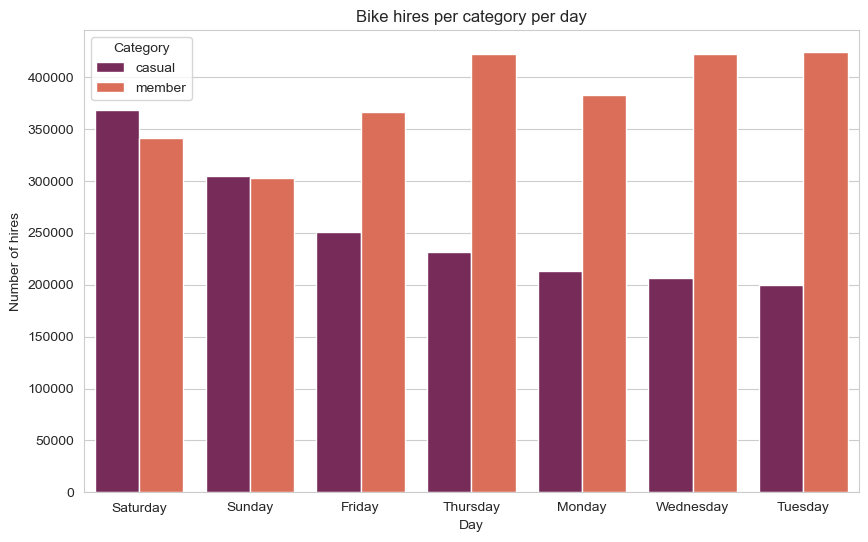

In [177]:
# Reshape the data to a long format
daily_casual_member_melted = cm_day.melt(id_vars=["Day"], 
                                        var_name="Category",
                                        value_name="Number of Hires")

plt.figure(figsize=(10, 6))
sns.barplot(x="Day", y="Number of Hires", hue="Category", data=daily_casual_member_melted, palette="rocket")
plt.title("Bike hires per category per day")
plt.xlabel("Day")
plt.ylabel("Number of hires")
plt.savefig("bikehires_per_day.png", dpi=300)
plt.show()

The average ride length per category member_casual
casual    23.818559
member    12.398602
Name: ride_length, dtype: float64


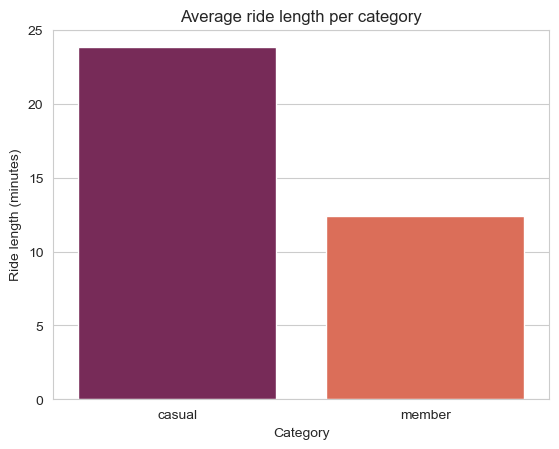

In [178]:
# Average ride length per category
average_ride_length = df_clean.groupby(["member_casual"])["ride_length"].mean()
print(f"The average ride length per category {average_ride_length}")

sns.barplot(x=average_ride_length.index, y=average_ride_length.values, palette="rocket")
plt.title("Average ride length per category")
plt.xlabel("Category")
plt.ylabel("Ride length (minutes)")
plt.savefig("average_ride_length_per_category.png", dpi=300)
plt.show()

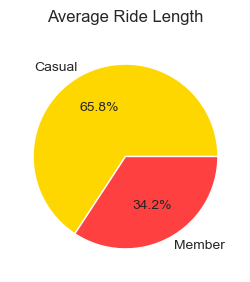

In [179]:
fig, ax = plt.subplots(figsize=(7, 3), dpi=100)
labels = ["Casual", "Member"]
colors = ['#FFD700', '#FF4040']
plt.pie(x=average_ride_length, autopct="%.1f%%", labels=labels,colors=colors)
ax.set_title("Average Ride Length", pad=14, fontsize=12, loc="center")
plt.savefig("average_ride_length_per_category_pie.png", dpi=300)
plt.show()

In [180]:
# Average ride length for riders by days of the week

average_daily_ride_length = df_clean.groupby(["member_casual", "day_of_week"])[
    "ride_length"
].mean()
print(f"Average ride length per category per day {average_daily_ride_length}")

weekly_average_ride_length_df = pd.DataFrame()

weekly_average_ride_length_df["casual"] = average_daily_ride_length["casual"]
weekly_average_ride_length_df["member"] = average_daily_ride_length["member"]
weekly_average_ride_length_df["Day"] = weekly_average_ride_length_df.index

print(weekly_average_ride_length_df)

Average ride length per category per day member_casual  day_of_week
casual         Friday         22.222889
               Monday         24.648717
               Saturday       26.632828
               Sunday         27.129646
               Thursday       21.117125
               Tuesday        21.292640
               Wednesday      20.474581
member         Friday         12.185252
               Monday         11.968015
               Saturday       13.947204
               Sunday         13.801511
               Thursday       11.984784
               Tuesday        11.723913
               Wednesday      11.807584
Name: ride_length, dtype: float64
                casual     member        Day
day_of_week                                 
Friday       22.222889  12.185252     Friday
Monday       24.648717  11.968015     Monday
Saturday     26.632828  13.947204   Saturday
Sunday       27.129646  13.801511     Sunday
Thursday     21.117125  11.984784   Thursday
Tuesday      21.292640 

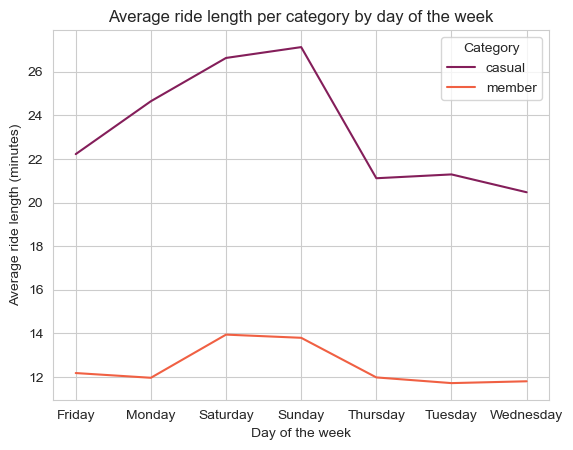

In [181]:
# Reshape the data to a long format
weekly_average_ride_length_melted = weekly_average_ride_length_df.melt(id_vars=["Day"], 
                                                                       var_name="Category", 
                                                                       value_name="Avg Ride Length")

# Create the line plot
sns.lineplot(x="Day", y="Avg Ride Length", hue="Category", data=weekly_average_ride_length_melted, palette="rocket")

# Add title and axis labels
plt.title("Average ride length per category by day of the week")
plt.xlabel("Day of the week")
plt.ylabel("Average ride length (minutes)")

# Save the plot with a high resolution
plt.savefig("weekly_average_ride_length.png", dpi=300)

# Show the plot
plt.show()

In [182]:
# Average ride length for riders by month
average_monthly_ride_length = df_clean.groupby(["member_casual", "month_name"])["ride_length"].mean()
print(f"Average ride length per category per month {average_monthly_ride_length}")

# Create a DataFrame to hold the data
monthly_average_ride_length_df = pd.DataFrame()
monthly_average_ride_length_df["casual"] = average_monthly_ride_length["casual"]
monthly_average_ride_length_df["member"] = average_monthly_ride_length["member"]
monthly_average_ride_length_df["Month"] = monthly_average_ride_length_df.index


Average ride length per category per month member_casual  month_name
casual         Apr           25.949134
               Aug           23.285695
               Dec           14.841845
               Feb           24.825196
               Jan           14.880357
               Jul           25.095020
               Jun           25.020218
               Mar           28.438877
               May           27.706539
               Nov           17.246721
               Oct           20.469450
               Sep           21.804793
member         Apr           11.609755
               Aug           13.106968
               Dec           10.201116
               Feb           10.645074
               Jan           10.003915
               Jul           13.503946
               Jun           13.684529
               Mar           11.796916
               May           13.301531
               Nov           10.827723
               Oct           11.675675
               Sep           12.62

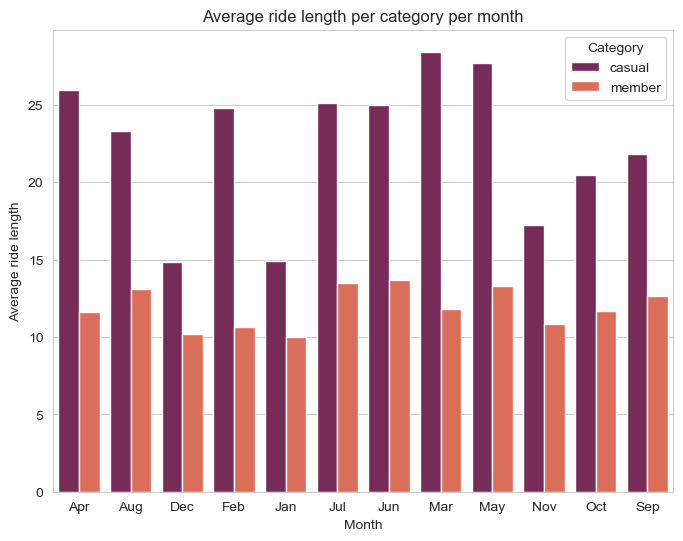

In [183]:
# Reshape the data to a long format
monthly_average_ride_length_melted = monthly_average_ride_length_df.melt(id_vars=["Month"], var_name="Category", value_name="Average Ride Length")

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the data using a bar plot
sns.barplot(x="Month", y="Average Ride Length", hue="Category", data=monthly_average_ride_length_melted, palette="rocket")
plt.title("Average ride length per category per month")
plt.xlabel("Month")
plt.ylabel("Average ride length")

# Save the plot with a high resolution
plt.savefig("monthly_average_ride_length.png", dpi=300)

# Show the plot
plt.show()